In [1]:
import numpy as numpy
import networkx as nx

In [2]:
def initialize_directed_graph_with_weights(edges):
    """
    Initializes a directed graph using the given weighted edges.
    :param edges: List of edges (i, j, weight) where there is a directed edge from i to j with the specified weight.
    :return: Directed graph G
    """
    G = nx.DiGraph()  # Create a directed graph
    G.add_weighted_edges_from(edges)  # Add edges with weights
    return G


In [3]:
def initialize_communities(G):
    """
    Initializes each node to its own community.
    :param G: Directed graph
    :return: Dictionary of initial communities
    """
    return {node: node for node in G.nodes()}  # Each node in its own community

In [4]:
def calculate_directed_modularity(G, communities, m):
    """
    Calculates the directed modularity for the graph with edge weights.
    :param G: Directed graph with weights
    :param communities: Dictionary with current community assignments
    :param m: Total weight (sum of all edge weights in the graph)
    :return: Modularity score
    """
    modularity = 0
    for i, j in G.edges():
        if communities[i] == communities[j]:  # Only consider edges within the same community
            ki_out = G.out_degree(i, weight='weight')  # Out-degree weighted
            kj_in = G.in_degree(j, weight='weight')    # In-degree weighted
            w_ij = G[i][j].get('weight', 1)  # Get edge weight between i and j
            modularity += (w_ij - (ki_out * kj_in) / m)
    return modularity / m


In [5]:
def directed_louvain_one_iter(G):
    """
    Runs one iteration of the Louvain algorithm on a directed weighted graph.
    :param G: Directed graph with weights
    :return: Final community assignments after one iteration
    """
    communities = initialize_communities(G)
    m = G.size(weight='weight')  # Total weight of all directed edges in G

    improvement = True
    while improvement:
        improvement = False
        for node in G.nodes():
            current_comm = communities[node]
            best_comm = current_comm
            best_delta_Q = 0

            # Evaluate each neighboring community
            for neighbor in G.neighbors(node):
                neighbor_comm = communities[neighbor]
                
                if neighbor_comm == current_comm:
                    continue
                
                # Temporarily move node to neighbor's community to calculate delta Q
                communities[node] = neighbor_comm
                delta_Q = calculate_directed_modularity(G, communities, m) - calculate_directed_modularity(G, {**communities, node: current_comm}, m)

                if delta_Q > best_delta_Q:
                    best_delta_Q = delta_Q
                    best_comm = neighbor_comm
            
            # If there's an improvement, update community assignment
            if best_comm != current_comm:
                communities[node] = best_comm
                improvement = True

    return communities


In [11]:
#edges = [(1, 2, 2.5), (2, 3, 1.5), (3, 1, 3.0), (3, 4, 2.0), (4, 5, 1.0)]  # Each tuple is (source, target, weight)
edges = [(1, 2, 2.5), (2, 3, 1.5), (3, 1, 3.0), (3, 4, 2.0), (4, 5, 1.0), (5, 1, 1.0)]
#G = initialize_directed_graph_with_weights(edges)
#final_communities = directed_louvain_one_iter(G)
#print("Final community assignments after one iteration:", final_communities)

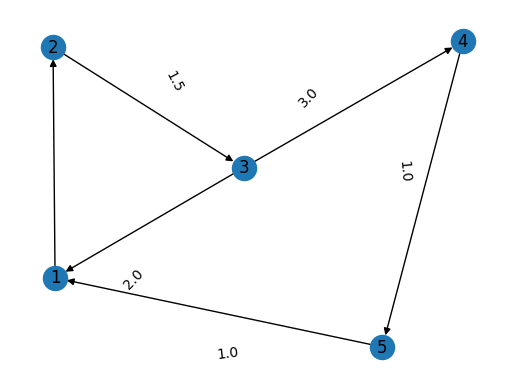

In [ ]:
import matplotlib.pyplot as plt
G = nx.DiGraph()
G.add_weighted_edges_from(edges)
# Show the weights of the edges too
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G), edge_labels=edge_labels)

#nx.draw(G, with_labels=True)
plt.show()
